##Data Loading and Analysis:

First I uploaded the data in google drive and then mounted the data to do the analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/student_data.csv'
data= pd.read_csv(path)

#displaying first 5 elements of the dataframe
data.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Duration of Sleep,Sample Question Papers Practiced,Performance
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [ ]:
#printing the dimension of the data
print(f'Rows: {data.shape[0]}')
print(f'Columns : {data.shape[1]}')

print("Data type of columns in the dataset: \n",data.dtypes)

Rows: 10000
Columns : 6
Data type of columns in the dataset: 
 Hours Studied                        int64
Previous Scores                      int64
Extracurricular Activities          object
Duration of Sleep                    int64
Sample Question Papers Practiced     int64
Performance                          int64
dtype: object


##Question 1.1:

From this dataset we want to find the effect of different factors on the Performance of the student.

So the **Dependent Variable** is : Performance

and **Independent Variables** are:

1. Hours Studied
2. Previous Scores
3. Extracurricular Activities
4. Duration of Sleep
5. Sample Question Papers Practiced

##data preprocessing:

The ```Extracurricular Activities``` column of the dataframe contains values  ```Yes``` and  ```No```, which are replaced by 1 and 0 respectively so that we can plot them as histograms.

In [ ]:
#replacing 'Yes' with 1 and 'No' with 0 in the 'Extracurricular Activities' column
data = data.replace({'Extracurricular Activities': {'Yes': 1, 'No': 0}})

#check to see the changes
data.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Duration of Sleep,Sample Question Papers Practiced,Performance
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


<Axes: ylabel='Frequency'>

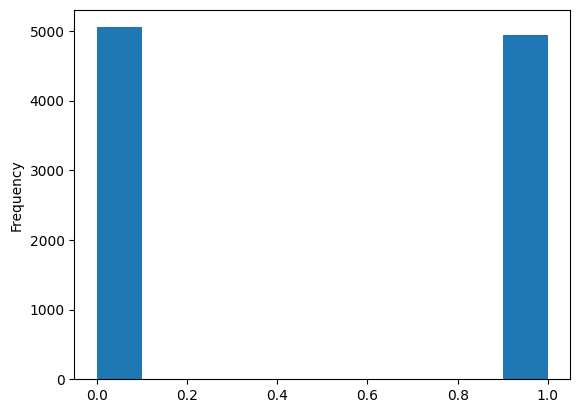

In [ ]:
data['Extracurricular Activities'].plot(kind = 'hist')
#as we can see there are 5000 "Yes"/1 values and 5000 "No"/0 values

<Axes: ylabel='Frequency'>

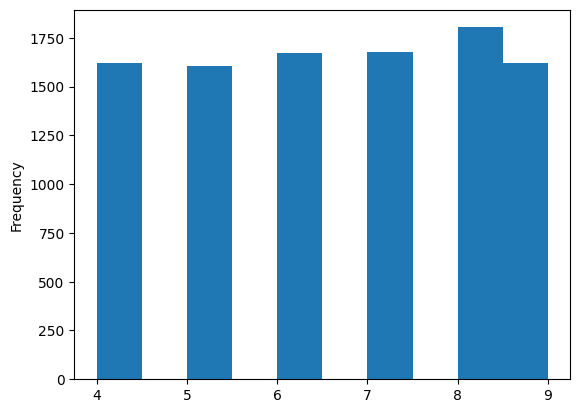

In [ ]:
data['Duration of Sleep'].plot(kind ='hist')
#the distribution of duration of sleep is also more or less even

<Axes: ylabel='Frequency'>

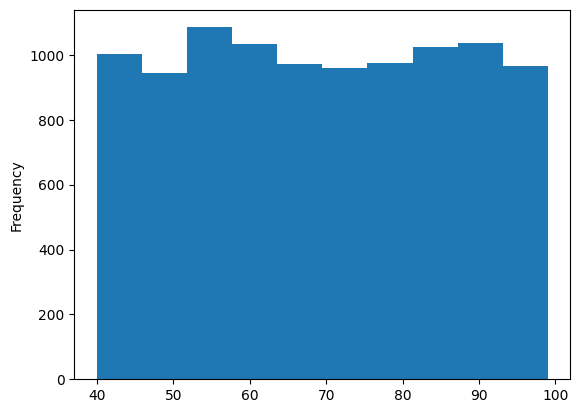

In [ ]:
data['Previous Scores'].plot(kind = 'hist')

##Standardizing Larger Values:

In the dataset we can see that the ```Previous Scores``` column had values that are quite large compared to other columns in the dataset. So to bring the data in similar range as other data points we have used standardization (z-score normalization)

In [ ]:
mean_score = data['Previous Scores'].mean()
std_score = data['Previous Scores'].std()

#Storing the mean and S.D of the 'Previous Score' column for future use:
print(f"For the column 'Previous Scores': mean = {mean_score}, standard deviation = {std_score}")

data['Previous Scores'] = (data['Previous Scores'] - data['Previous Scores'].mean()) / data['Previous Scores'].std()

data.head(5)

For the column 'Previous Scores': mean = 69.4457, standard deviation = 17.343152251047105


,Hours Studied,Previous Scores,Extracurricular Activities,Duration of Sleep,Sample Question Papers Practiced,Performance
0,7,1.704090,1,9,1,91
1,4,0.723876,0,4,2,65
2,8,-1.063573,1,7,2,45
3,5,-1.005913,1,5,2,36
4,7,0.320259,0,8,5,66


##Question 1.3: Splitting the Data

The question asked to split the entire dataset into train data (80%) and test data(20%). We have used ```iloc``` to turn the first 8000 entries into train data and the last 2000 entries into test data.

In [ ]:
train_data = data.iloc[:8000,:]
train_data.shape

(8000, 6)

In [ ]:
test_data = data.iloc[8000:,:]
test_data.shape

(2000, 6)

Now we have used the ```to_numpy()``` method to convert the dataset into a numpy array for calculation purpose

In [ ]:
import numpy as np

train_data = train_data.to_numpy()
test_data = test_data.to_numpy()

print("train_data in numpy:\n", train_data)

train_data in numpy:
 [[ 7.          1.70409044  1.          9.          1.         91.        ]
 [ 4.          0.72387648  0.          4.          2.         65.        ]
 [ 8.         -1.06357251  1.          7.          2.         45.        ]
 ...
 [ 5.          0.95451506  1.          8.          8.         69.        ]
 [ 7.         -0.94825322  1.          6.          3.         47.        ]
 [ 3.          0.72387648  0.          8.          3.         64.        ]]


In [ ]:
#slicing the numpy arrays to get the X and y for the train_data and test_data

X_train_data = train_data[:,:5]
y_train_data = train_data[:,5:]

print('initial dimension of y_train_data : ', y_train_data.shape)
#we needed to flatten the y_train_data as the dimensions were creating problem while running the code
y_train_data = y_train_data.flatten().T


print("X_train_data shape : ",X_train_data.shape)
print("y_train_data shape : ",y_train_data.shape)

initial dimension of y_train_data :  (8000, 1)
X shape :  (8000, 5)
y shape :  (8000,)


In [ ]:
X_test_data = test_data[:,:5]
y_test_data = test_data[:,5:]

#same method applied for the y_test_data also
y_test_data = y_test_data.flatten().T

print("X_test_data shape : ",X_test_data.shape)
print("y_test_data shape : ",y_test_data.shape)

X shape :  (2000, 5)
y shape :  (2000,)


##Question 1.4: Implementing the linear regression function

We have implemented linear regression in the ```linearRegression``` function which takes two parameters, ```X_train``` and ```y_train``` as input(i.e. the training dataset).

In [ ]:
def linearRegression(X_train, y_train):
  epochs = int(input("Enter the number of epochs : "))
  learning_rate = float(input("Enter the learning rate(0 < learning_rate < 1) : "))
  error_per_epoch = np.zeros(epochs)

  sample_size, features = X_train.shape

  weights = np.zeros(features)
  bias = 0

  for i in range (epochs):
    y_predicted = np.dot(X_train, weights) + bias

    mse_error = np.sum((y_predicted - y_train)**2)/(2*sample_size)

    error_per_epoch[i] = mse_error

    dj_dw = (1/sample_size)*np.dot((y_predicted - y_train), X_train)
    dj_db = (1/sample_size)*np.sum(y_predicted - y_train)

    weights = weights - learning_rate*dj_dw
    bias = bias - learning_rate*dj_db

  print(f"Final weights: {weights}")
  print(f"Final bias: {bias}")

  return weights, bias, error_per_epoch

For the current demonstration we have taken epoch = 5000 and learning rate = 0.02

In [ ]:
#retriving the weights, bias and error_per_epoch array from the function for future use
weights, bias, error_per_epoch = linearRegression(X_train_data, y_train_data)

Enter the number of epochs : 5000
Enter the learning rate(0 < learning_rate < 1) : .02
Final weights: [ 2.86702974 17.65447502  0.68318252  0.52318604  0.20289693]
Final bias: 36.19034308423426


##Question 1.6: Getting prediction for new data.

In this part, we have implemented the predict funtion which returns

```X_test . weights + bias``` which is the value predicted by the model.

In the second part we take student data as input and then predict his/her score according to the model.

**FOR THE DATA OF THE GIVEN STUDENT THE SCORE WAS:**

**87.834**

In [ ]:
def predict(X_test, weights, bias):
  return np.dot(X_test, weights) + bias

In [ ]:
#evaluation of student's performance:

hours_of_study = int(input("Enter hours studied: "))

previous_score = int(input("Previous Score: "))
previous_score = (previous_score - mean_score)/std_score

extracurricular_activities = input("Extracurricular Activities(Yes/No): ")
if (extracurricular_activities.lower() == 'yes'):
  extracurricular_activities = 1
else:
  extracurricular_activities = 0

duration_of_sleep = int(input("Duration of sleep: "))

sample_question_papers_practiced = int(input("Sample question papers practiced: "))

student_data = np.array([hours_of_study, previous_score, extracurricular_activities, duration_of_sleep, sample_question_papers_practiced])


Enter hours studied: 7
Previous Score: 95
Extracurricular Activities(Yes/No): yes
Duration of sleep: 7
Sample question papers practiced: 6


In [ ]:
print(f"Predicted Performance : {predict(student_data, weights, bias)}")

Enter the number of epochs : 5000
Enter the learning rate(0 < learning_rate < 1) : .02
Final weights: [ 2.86702974 17.65447502  0.68318252  0.52318604  0.20289693]
Final bias: 36.19034308423426
Predicted Performance : 87.83543676032423


##Question 1.7: Evaluation of performance of the model

Here we have taken 2 functions, one for calculating the mean square error(```evaluate_mse```) and other for the R2 score(```evaluate_r2_score```)

In [ ]:

def evaluate_mse(X_test, y_test, weights, bias):
  sample_size = X_test.shape[0]
  y_predicted = predict(X_test, weights, bias)
  mse = np.sum((y_predicted - y_test)**2)/(sample_size)

  return mse

def evaluate_r2_score(X_test, y_test, weights, bias):
  y_predicted = predict(X_test, weights, bias)
  ss_res = np.sum((y_test - y_predicted)**2)
  ss_total = np.sum((y_test - np.mean(y_test))**2)

  return 1 - (ss_res/ss_total)

##Question 1.5: Plotting the Loss vs epoch graph

Here we have plotted the loss vs epoch graph and also derived the performance of our model based on two metrices (MSE and R2 score)

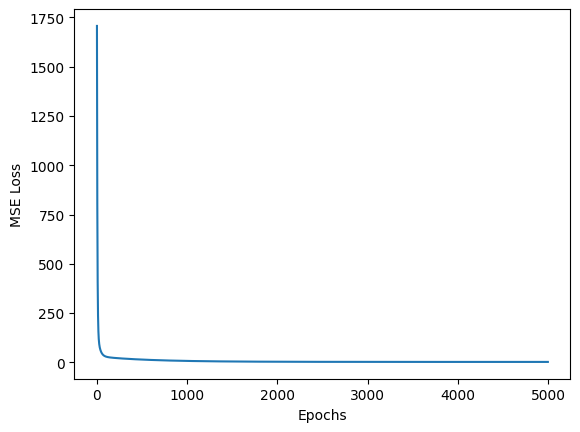

mean square error loss for test data: 4.250041413910027
R2 score for test data: 0.9883620865658942


In [ ]:
import matplotlib.pyplot as plt

plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.plot(error_per_epoch)
plt.show()

print(f"mean square error loss for test data: {evaluate_mse(X_test_data, y_test_data, weights, bias)}")
print(f"R2 score for test data: {evaluate_r2_score(X_test_data, y_test_data, weights, bias)}")